In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("annual-number-of-deaths-by-cause.csv")
df

,Entity,Code,Year,Execution,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,Afghanistan,AFG,2007,15,9121.085992,29066.442137,461.195202,1846.996686,1199.0,53532.680495,...,28477.081107,96.027592,296.000026,10366.124292,160.930121,1941.282198,1378.571549,8216.000975,4691.007199,305.207239
1,Afghanistan,AFG,2008,17,8387.057275,26623.480551,437.718960,1681.270324,1092.0,53402.322328,...,28234.015837,98.308461,0.000000,8994.815981,156.860722,1765.980756,1411.783229,6748.999931,4750.240999,300.246001
2,Afghanistan,AFG,2009,0,7318.273004,24792.335792,415.776634,1568.095029,1065.0,53024.450772,...,27897.481121,100.088778,101.000000,7996.529795,152.144044,1647.863334,1428.808015,7562.996178,4784.225283,295.413907
3,Afghanistan,AFG,2011,2,6919.757958,23115.144836,299.758258,1468.203744,1525.0,52815.737495,...,27198.628720,105.565020,62.000000,7053.113394,150.311602,1543.182842,1496.192418,9061.000023,4954.293898,311.997686
4,Afghanistan,AFG,2012,14,6631.942601,22155.754481,302.255411,1406.214788,3521.0,52961.704530,...,26830.686222,108.281688,333.000006,6577.552474,193.388959,1478.263352,1528.384710,11332.990002,5075.765738,316.256517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,Zimbabwe,ZWE,2013,NaN,1820.090331,13108.151347,25.015658,3507.171892,1.0,16900.858090,...,9439.290155,73.649954,125.000002,5129.483596,44.403541,3557.450127,2561.496069,7.000000,2599.112561,410.802638
6682,Zimbabwe,ZWE,2014,NaN,1769.993458,12841.510671,25.623337,3380.319464,0.0,16755.843066,...,9106.657298,73.460128,8.500000,4946.075661,43.073231,3428.811706,2554.170577,3.000000,2625.681137,406.351616
6683,Zimbabwe,ZWE,2015,NaN,1728.691503,12637.728613,25.415872,3263.941226,NaN,16691.109079,...,8887.033499,74.605887,15.500000,4737.642966,42.139866,3310.899062,2583.031015,12.000000,2657.480378,404.641729
6684,Zimbabwe,ZWE,2016,NaN,1703.437894,12495.147292,25.752116,3188.723249,NaN,16781.946571,...,8653.776455,75.907792,31.000000,4602.100769,41.675497,3235.070735,2619.243794,6.000000,2712.995017,405.940831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      6686 non-null   object 
 1   Code                                        5545 non-null   object 
 2   Year                                        6686 non-null   int64  
 3   Execution                                   267 non-null    object 
 4   Meningitis                                  6468 non-null   float64
 5   Lower respiratory infections                6468 non-null   float64
 6   Intestinal infectious diseases              6156 non-null   float64
 7   Protein-energy malnutrition                 6468 non-null   float64
 8   Terrorism                                   2891 non-null   float64
 9   Cardiovascular diseases                     6468 non-null   float64
 10  Alzheimer di

In [4]:
df[df["Fire, heat, and hot substances"].isnull()].sum()

C:\Users\shail\AppData\Local\Temp/ipykernel_3996/249865532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Fire, heat, and hot substances"].isnull()].sum()


Entity                                        Australasia & OceaniaAustralasia & OceaniaAust...
Year                                                                                     436559
Meningitis                                                                                  0.0
Lower respiratory infections                                                                0.0
Intestinal infectious diseases                                                              0.0
Protein-energy malnutrition                                                                 0.0
Terrorism                                                                              146381.0
Cardiovascular diseases                                                                     0.0
Alzheimer disease and other dementias                                                       0.0
Chronic kidney disease                                                                      0.0
Chronic respiratory diseases            

In [5]:
# Replace null/Nan values with 0
df.iloc[:,2:] = df.iloc[:,2:].replace({np.nan: 0})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      6686 non-null   object 
 1   Code                                        5545 non-null   object 
 2   Year                                        6686 non-null   int64  
 3   Execution                                   6686 non-null   object 
 4   Meningitis                                  6686 non-null   float64
 5   Lower respiratory infections                6686 non-null   float64
 6   Intestinal infectious diseases              6686 non-null   float64
 7   Protein-energy malnutrition                 6686 non-null   float64
 8   Terrorism                                   6686 non-null   float64
 9   Cardiovascular diseases                     6686 non-null   float64
 10  Alzheimer di

In [8]:
# Values in the death count cells are floating numbers, lets convert them to integers as these values represent counts of death
df.iloc[:,4:] = df.iloc[:,4:].astype(int)
df.head()

,Entity,Code,Year,Execution,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,Afghanistan,AFG,2007,15,9121,29066,461,1846,1199,53532,...,28477,96,296,10366,160,1941,1378,8216,4691,305
1,Afghanistan,AFG,2008,17,8387,26623,437,1681,1092,53402,...,28234,98,0,8994,156,1765,1411,6748,4750,300
2,Afghanistan,AFG,2009,0,7318,24792,415,1568,1065,53024,...,27897,100,100,7996,152,1647,1428,7562,4784,295
3,Afghanistan,AFG,2011,2,6919,23115,299,1468,1525,52815,...,27198,105,61,7053,150,1543,1496,9061,4954,311
4,Afghanistan,AFG,2012,14,6631,22155,302,1406,3521,52961,...,26830,108,333,6577,193,1478,1528,11332,5075,316


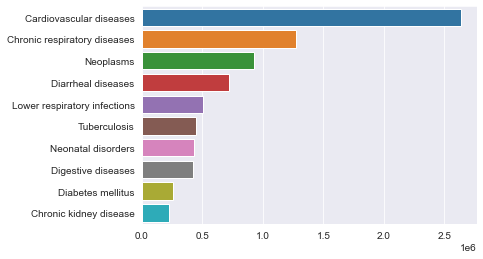

In [9]:
# Top 10 causes of death for India in 2017 (latest available year)

india_2017 = df[df.Entity == "India"].groupby("Year").sum().loc[2017].sort_values(ascending=False)
sns.barplot(x=india_2017.values[:10],y=india_2017.index[:10],orient="h")
plt.show()

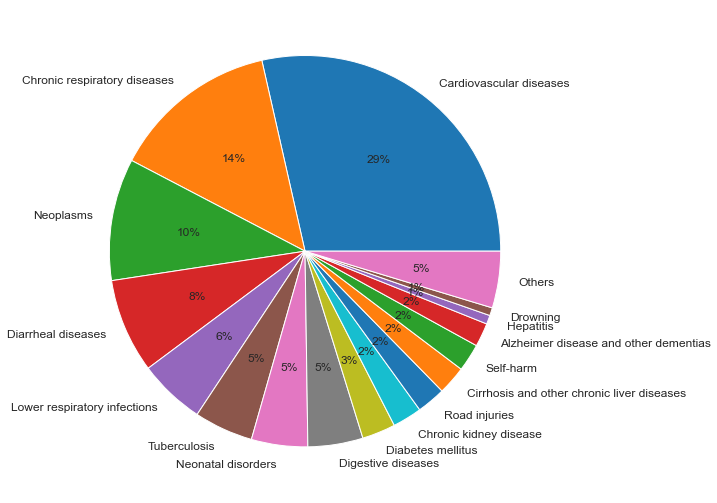

In [10]:
india_2017_pie = india_2017[india_2017 > 60000]
india_2017_pie["Others"] = sum(india_2017[india_2017 <= 60000])
india_2017_pie.plot(kind="pie",autopct="%.0f%%",figsize=(9,9),fontsize=12)
plt.ylabel("")
plt.show()

In [11]:
df.corr()

,Year,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Alzheimer disease and other dementias,Chronic kidney disease,Chronic respiratory diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
Year,1.000000,-0.032907,-0.022094,-0.026423,-0.056199,0.074207,0.027306,0.064309,0.053964,0.004125,...,-0.030252,0.020247,0.003551,-0.030254,-0.008558,-0.053809,-0.004466,-0.017649,0.057062,-0.005601
Meningitis,-0.032907,1.000000,0.957246,0.819520,0.969750,0.472546,0.722383,0.602769,0.770551,0.773954,...,0.970888,0.648714,0.300947,0.962825,0.682436,0.974753,0.787202,0.495800,0.763691,0.749176
Lower respiratory infections,-0.022094,0.957246,1.000000,0.838776,0.931987,0.520380,0.863987,0.767258,0.896667,0.904601,...,0.976249,0.767818,0.334914,0.946799,0.770372,0.945096,0.918942,0.482215,0.885161,0.855662
Intestinal infectious diseases,-0.026423,0.819520,0.838776,1.000000,0.758013,0.419240,0.656623,0.522372,0.723035,0.753740,...,0.894868,0.586456,0.288420,0.910629,0.625815,0.786816,0.753205,0.343334,0.705159,0.629431
Protein-energy malnutrition,-0.056199,0.969750,0.931987,0.758013,1.000000,0.409875,0.682937,0.566561,0.720702,0.746535,...,0.937596,0.608579,0.285493,0.926090,0.647735,0.998509,0.755168,0.505602,0.711626,0.728642
Terrorism,0.074207,0.472546,0.520380,0.419240,0.409875,1.000000,0.544900,0.544793,0.598184,0.504671,...,0.489048,0.485435,0.126431,0.469532,0.429913,0.422971,0.512605,0.335029,0.604116,0.467736
Cardiovascular diseases,0.027306,0.722383,0.863987,0.656623,0.682937,0.544900,1.000000,0.934815,0.959351,0.938073,...,0.776284,0.920893,0.324238,0.706130,0.848619,0.701291,0.967427,0.387370,0.954653,0.952492
Alzheimer disease and other dementias,0.064309,0.602769,0.767258,0.522372,0.566561,0.544793,0.934815,1.000000,0.924668,0.834640,...,0.641453,0.843496,0.280593,0.578107,0.718816,0.582145,0.878254,0.337009,0.916814,0.814150
Chronic kidney disease,0.053964,0.770551,0.896667,0.723035,0.720702,0.598184,0.959351,0.924668,1.000000,0.939005,...,0.824576,0.838929,0.338666,0.770740,0.756735,0.741400,0.944077,0.407650,0.994301,0.882479
Chronic respiratory diseases,0.004125,0.773954,0.904601,0.753740,0.746535,0.504671,0.938073,0.834640,0.939005,1.000000,...,0.850999,0.793159,0.334236,0.793927,0.770292,0.768785,0.973020,0.378986,0.919805,0.925184


In [12]:
df.groupby('Year').sum()

,Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,Alzheimer disease and other dementias,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
Year,,,,,,,,,,,,,,,,,,,,,
1990,2151769,15891992,886058,2389285,21444,57609890,5023207,2891173,15488336,4284803,...,13407348,548764,207929,11466707,278781,2638607,3598220,486975,2905549,373411
1991,2144181,15761596,885653,2362442,25287,58434050,5208113,2944895,15779911,4384685,...,13301298,581538,605570,11389399,287068,2608561,3690261,412431,2997652,376020
1992,2144964,15615401,885426,2322961,29226,59463288,5379182,3020136,16057400,4480385,...,13188192,640861,53102,11169000,302022,2567561,3825697,296950,3103009,384075
1993,2133315,15453465,882457,2282206,0,61239623,5576215,3088974,16292733,4576775,...,13041176,730508,91493,10962631,332220,2522972,3957722,307855,3224832,396939
1994,2111563,15240684,882114,2253530,23070,62335516,5745858,3152874,16468377,4662069,...,12830144,797598,53802,10763730,353681,2491453,4051274,2822457,3334546,402001
1995,2098062,15060868,874454,2598364,18309,62855871,5920056,3220707,16565350,4742805,...,12668302,804233,97591,10545136,355524,2833198,4088226,314407,3449094,399723
1996,2142925,14819608,863303,2522523,20898,63009639,6076468,3288737,16669093,4791785,...,12472961,780573,65347,10269701,334648,2749413,4030491,418459,3566027,391801
1997,2062334,14645356,853466,2465366,32772,63338285,6235237,3380148,16860025,4844612,...,12369194,757625,80015,10071955,318223,2689727,3992931,602227,3692658,383042
1998,2021980,14435031,841888,2406760,14064,63804217,6413428,3474025,16975974,4886476,...,12257432,757316,204184,9911328,322773,2627722,3969207,540313,3812027,376847


In [13]:
# The "Execution" column is actually not numeric as it has categories like ">1000", let's fix it and continue descriptive stats
df.Execution.replace({'>1000':1000, '>1': 1},inplace=True)
df.Execution = df.Execution.astype(int)

Text(0.5, 0, 'Total # of Executions')

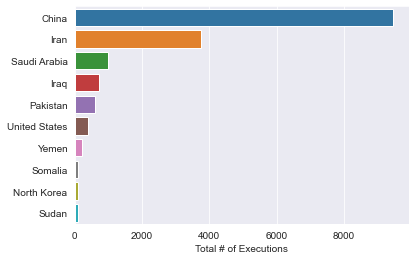

In [14]:
# Top 10 countries with the highest execution numbers
country_execution = df.groupby("Entity").sum()["Execution"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Executions")

Text(0.5, 0, 'Total Deaths 1990-2017')

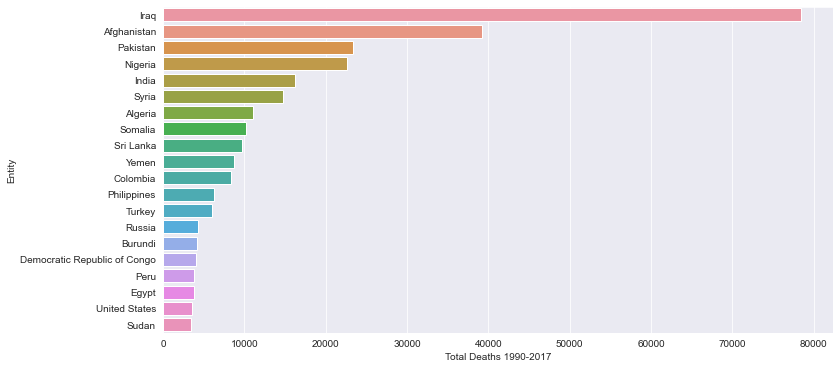

In [15]:
# Top 20 countries which suffered from terrorism the most
country_terrorism = df[df.Code.notnull()].groupby("Entity").sum()["Terrorism"].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_terrorism[1:21].values,y=country_terrorism[1:21].index,orient="h")
plt.xlabel("Total Deaths 1990-2017")

Text(0, 0.5, '# of Deaths')

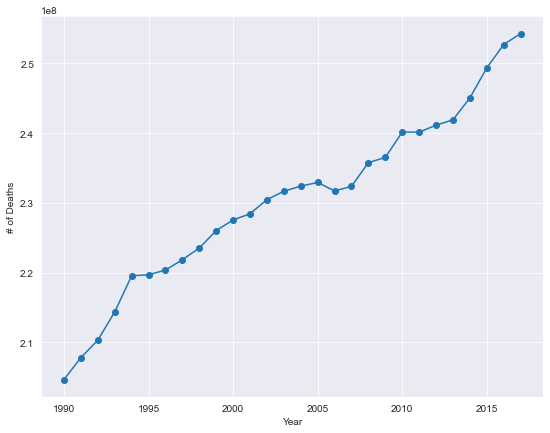

In [16]:
# Deadliest Year
# Deadliest year appears to be 2017 in terms of death counts, however this was due to the increase of the world population each year
df["total_death"] = df.iloc[:,3:].sum(axis=1)
death_by_year = df.groupby("Year").sum()["total_death"]

fig = plt.figure(figsize=(9,7))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

In [21]:
world_population = "7547858925	7464022049	7379797139	7295290765	7210581976	7125828059	7041194301	6956823603	6872767093	6789088686	6705946610	6623517833	6541907027	6461159389	6381185114	6301773188	6222626606	6143493823	6064239055	5984793942	5905045788	5824891951	5744212979	5663150427	5581597546	5498919809	5414289444	5327231061".split("	")
world_population = pd.Series(world_population).astype(int).sort_values(ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(death_by_year.index,100*death_by_year.values/world_population,marker="o")
ax.annotate("1994",xy=(1994,3.87), xytext=(1993,3.7), arrowprops=dict(facecolor="tomato",shrink=0.05))
plt.ylabel("# of Death / Population (%)")

OverflowError: Python int too large to convert to C long

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


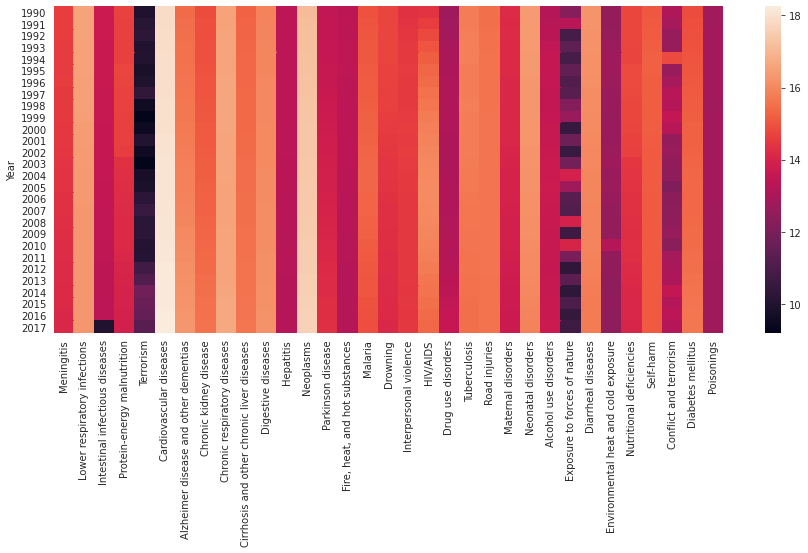

In [131]:
# Lets examine what was the cause for this high death rate in 1994. Conflict column of the heatmap shows an interesting light colour on year 1994 (the lighter the colour the higher the number of deaths)

plt.figure(figsize=(15,6))
sns.heatmap(np.log(df.drop(["Entity","Execution","total_death"],axis=1).groupby("Year").sum()).replace(-np.inf,10))
plt.show()

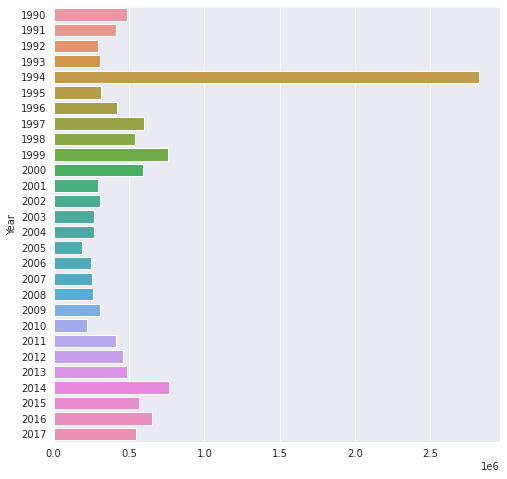

In [132]:
# Conflict graph shows that 1994 was the year where the deadliest conflicts took place in the world. 

year_conflict = df.groupby("Year").sum()["Conflict and terrorism"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")
plt.show()

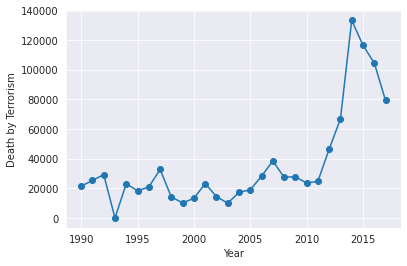

In [133]:
# Death by terrorism peaked in 2014, and has been declining since then
df.groupby("Year").sum()["Terrorism"].plot(marker="o")
plt.ylabel("Death by Terrorism")
plt.show()

In [134]:
# Which country suffers from what disease the most?


df.Code = df.Code.dropna().apply(str.lower)
cause_by_country = df.groupby("Code").sum().drop(["Year","total_death"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

Cardiovascular diseases         155
HIV/AIDS                         17
Execution                         7
Malaria                           7
Terrorism                         6
Neoplasms                         5
Lower respiratory infections      5
Diarrheal diseases                4
Neonatal disorders                2
Conflict and terrorism            1
dtype: int64

In [135]:
# Group countries by the most frequent disease types
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

In [136]:
# In order to colour countries by disease, lets use pygal package
!pip install pygal_maps_world
!pip install pycountry
!pip install CairoSVG


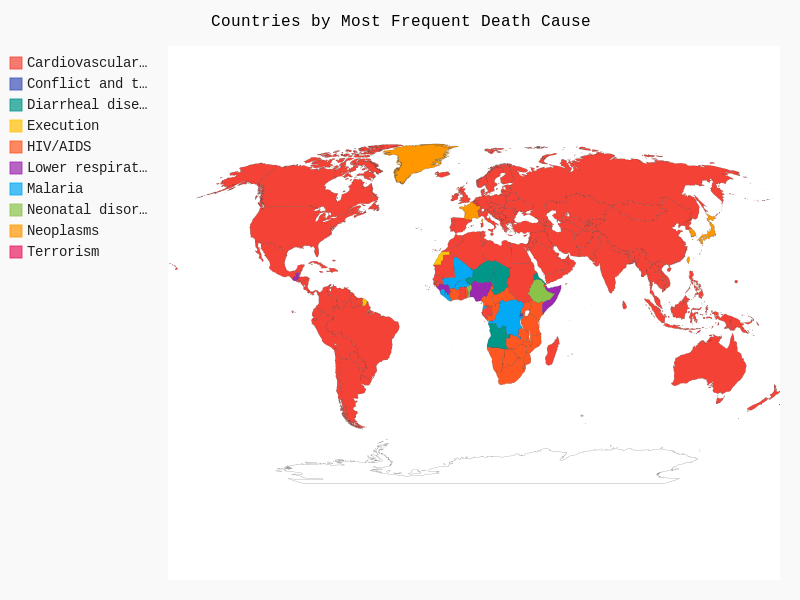

In [137]:
# We will need the pycountry package to convert 3 digit country codes to 2 digit country codes which is needed in pygal world mapping
import pycountry
country_mapping = {country.alpha_3.lower(): country.alpha_2.lower() for country in pycountry.countries}

# Use pycountry to convert country names into country codes which will be used in the map
from pygal_maps_world.maps import World
worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause'

for cause in cause_by_country.index:
    countries = [country_mapping.get(country) for country in cause_by_country.loc[cause].values[0]]
    worldmap_chart.add(cause, countries)
  
worldmap_chart.render()
worldmap_chart

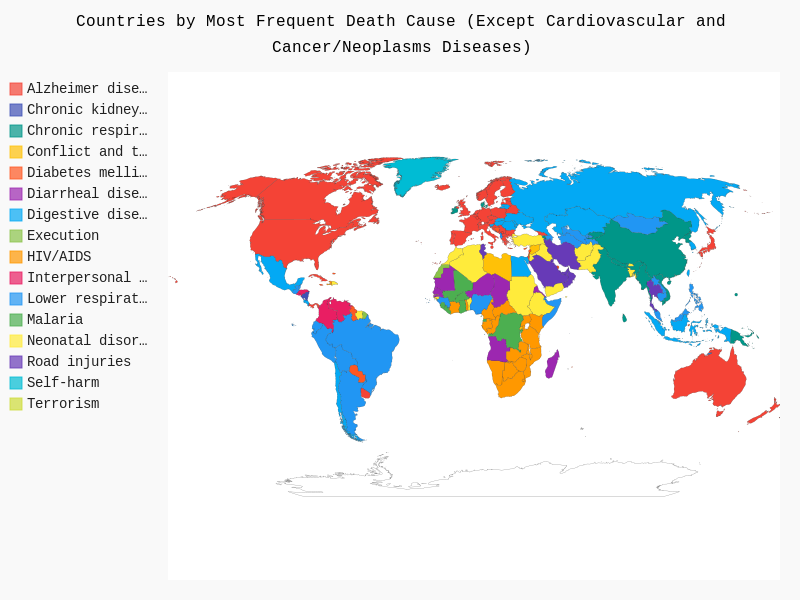

In [138]:
cause_by_country = df.groupby("Code").sum().drop(["Year","total_death","Cardiovascular diseases", "Neoplasms"],axis=1).idxmax(axis=1)
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause (Except Cardiovascular and Cancer/Neoplasms Diseases)'

for cause in cause_by_country.index:
  countries = [country_mapping.get(country) for country in cause_by_country.loc[cause].values[0]]
  worldmap_chart.add(cause, countries)
  
worldmap_chart.render()
worldmap_chart

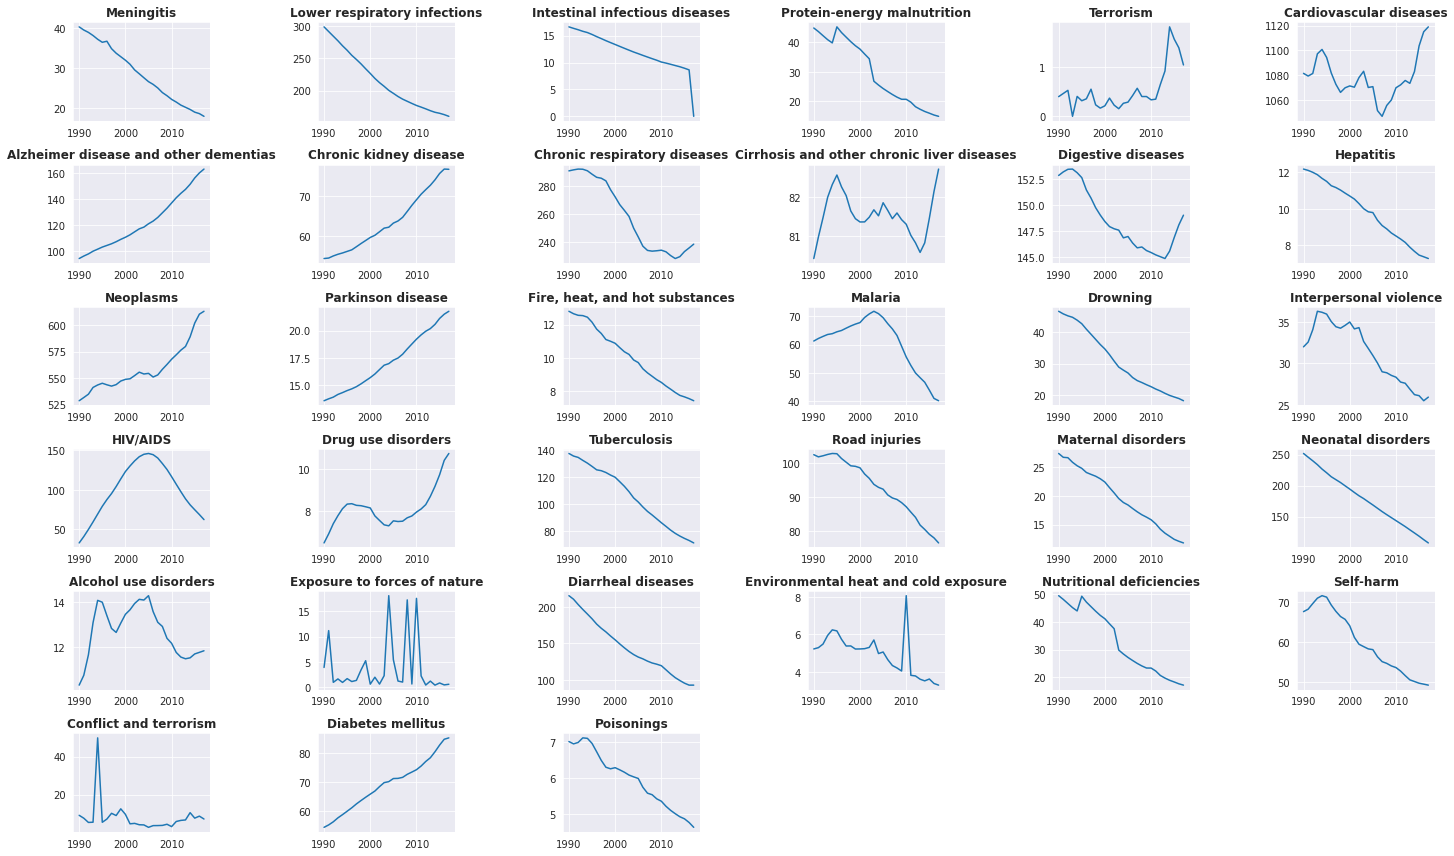

In [139]:
# Historical Trends of Diseases
# Let's now group the diseases by their historical increasing or decreasing trends. Calculations will be based on deaths per 100000 for particular disease.

# Following diseases show monotonic decrease trend over years:

# Even though Digestive and Respiratory diseases were dropping constantly for period of time, they started to enter an increasing trend since 2013. Still way better as compared to 90s
# Suicide rates are dropping since mid-90s
# Peak in the Heat graph could be a mistake in the dataset or it is a very distinguishing event happened in 2010 which caused this sudden jump

world_population.index = range(1990,2018)
yearly_counts = df.groupby("Year").sum()
yearly_counts = yearly_counts.apply(lambda x: 100000*x/world_population)

plt.figure(figsize=(20,12))
# for i,cause in enumerate(yearly_counts[['Meningitis', 'Lower respiratory infections', 'Intestinal infectious diseases', 'Protein-energy malnutrition','Respiratory diseases', 
#                                         'Digestive diseases', 'Hepatitis', 'Fire', 'Malaria', 'Drowning', 'Homicide', 'Tuberculosis', 'Road injuries', 'Maternal disorders', 
#                                         'Neonatal disorders', 'Diarrheal diseases', 'Heat', 'Nutritional deficiencies', 'Suicide', 'Poisonings'
#                                         ]]):
  
for i, cause in enumerate(yearly_counts[['Meningitis','Lower respiratory infections','Intestinal infectious diseases','Protein-energy malnutrition','Terrorism','Cardiovascular diseases','Alzheimer disease and other dementias','Chronic kidney disease','Chronic respiratory diseases','Cirrhosis and other chronic liver diseases','Digestive diseases','Hepatitis','Neoplasms','Parkinson disease','Fire, heat, and hot substances','Malaria','Drowning','Interpersonal violence','HIV/AIDS','Drug use disorders','Tuberculosis','Road injuries','Maternal disorders','Neonatal disorders','Alcohol use disorders','Exposure to forces of nature','Diarrheal diseases','Environmental heat and cold exposure','Nutritional deficiencies','Self-harm','Conflict and terrorism','Diabetes mellitus','Poisonings']]):
    plt.subplot(6,6,i+1)
    sns.lineplot(x=yearly_counts.index,y=yearly_counts[cause])
    plt.title(cause,fontweight="bold")
    plt.ylabel("")
    plt.xlabel("")

plt.tight_layout()

## Following are the death causes

- Alzheimer disease and other dementias, Chronic kidney diseases, Neoplasms, Parkinson, and Diabetes diseases have been increasing since the beginning of our data span (1990)
- While deaths related to Meningitis, Lower respiratory infections, Intestinal infectious diseases, Hepatitis, Drowning, Fire, heat, and hot substances, Tuberculosis, Road injuries, Maternal disorders, Neonatal disorders, Diarrheal diseases, Poisonings have been decreasing since the beginning of our data span(1990)
- Drug and alcohol use disorders are correlated with Liver disease trend
- HIV/AIDS related deaths rate started to decline since 2005
- Malaria related deaths rate started to decline since 2004
- While drug related deaths are consistently increasing since 2005
- Natural disasters show no trend as expected

# PART 2 : INBUILT DATASET

In [140]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [141]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [143]:
# to display no. of samples on each class
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## STATISTICAL INSIGHTS:
1. CENTRAL TENDENCIES LIKE MEAN MEDIAN MODE 
2. STANDARD DEVIATION 
3. NUMBER OF UNIQUE ENTRIES IN EACH COLUMN 
4. NUMBER OF NULL ROWS.

In [144]:
df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [145]:
# Sample median for every numeric column
df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

The sample variance is a measure of dispersion, roughly the “average” squared distance of a data point from the mean. The standard deviation is the square root of the variance and interpreted as the “average” distance a data point is from the mean.

In [146]:
df.var()    # Sample variance for every numeric column


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [147]:
df.std()    # Sample standard deviance for every numeric column

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

The 𝑝th percentile is the number in the dataset such that roughly 𝑝% of the data is less than this number. This number is also referred to as a quantile.

In [148]:
df.quantile(.1)   # The 10th percentile

sepal_length    4.8
sepal_width     2.5
petal_length    1.4
petal_width     0.2
Name: 0.1, dtype: float64

In [149]:
df.quantile(.95)    # The 95th percentile

sepal_length    7.255
sepal_width     3.800
petal_length    6.100
petal_width     2.300
Name: 0.95, dtype: float64

In [150]:
df.quantile(.75)    # Commonly known as the third quartile

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [151]:
df.quantile(.25)    # Commonly known as the first quartile

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

In [152]:
# If 𝑄𝑖 denotes the 𝑖th quartile, the inner-quartile range (IQR) is the difference between the third quartile and the first quartile.

df.quantile(.75) - df.quantile(.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [153]:
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [154]:
df.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [155]:
# Many of these summaries work for grouped data as well.
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [156]:
df.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

## Preprocessing the dataset

In [157]:
# check for null values
df.isnull().any()
# There are no null values.

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [158]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


## Exploratory Data Analysis

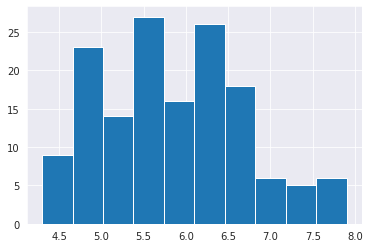

In [159]:
# histograms
df['sepal_length'].hist()
plt.show()

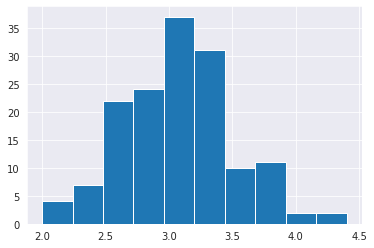

In [160]:
df['sepal_width'].hist()
plt.show()

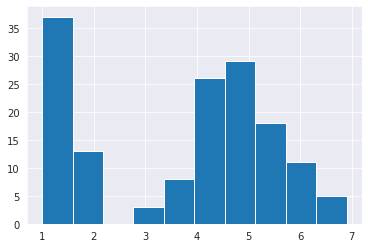

In [161]:
df['petal_length'].hist()
plt.show()

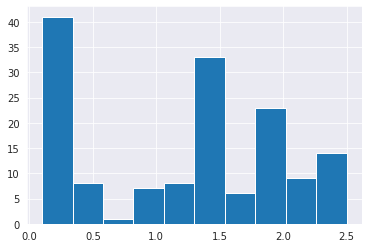

In [162]:
df['petal_width'].hist()
plt.show()

In [163]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['virginica','versicolor','setosa']

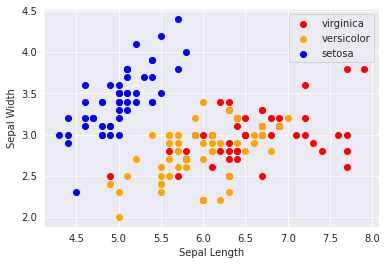

In [164]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

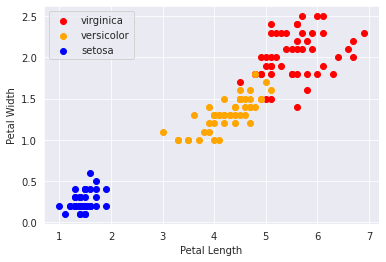

In [165]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

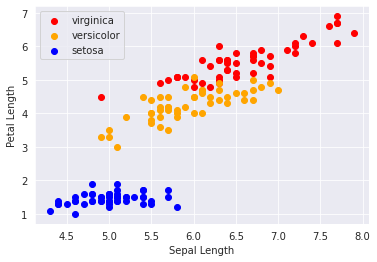

In [166]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

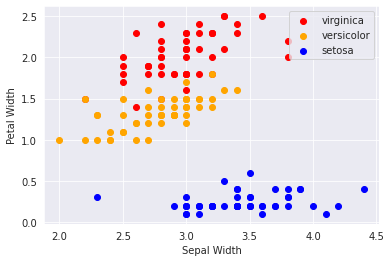

In [167]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [168]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


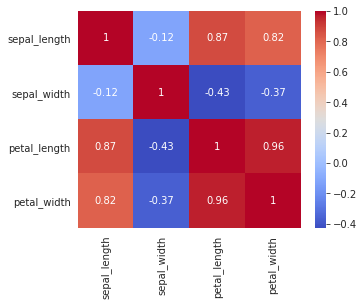

In [169]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')
plt.show()

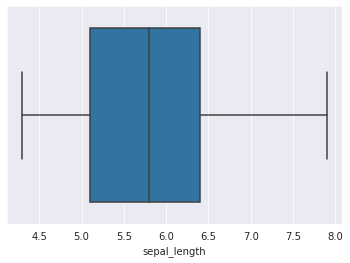

In [170]:
sns.boxplot(x=df[ 'sepal_length'])
plt.show()

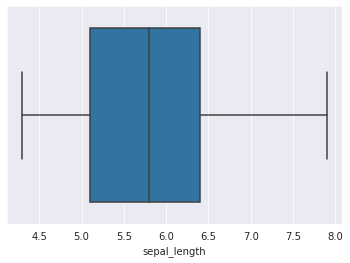

In [171]:
sns.boxplot(x=df[ 'sepal_length'])
plt.show()

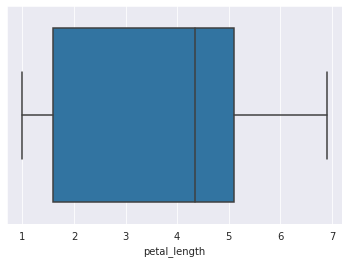

In [172]:
sns.boxplot(x=df[ 'petal_length'])
plt.show()

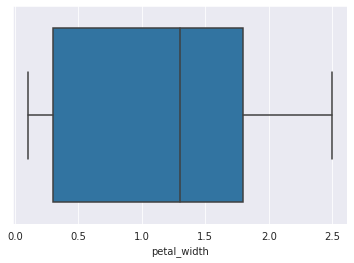

In [173]:
sns.boxplot(x=df[ 'petal_width'])
plt.show()